# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time


time_vec = []
time_unvec = []

for ln_diag in range(1, 300):
    sm_vec = 0
    sm_unvec = 0
    for xx in range(200):
        x_ln = random.randint(ln_diag, 300)
        x = np.random.rand(ln_diag, x_ln) * 3

        tm1 = time()
        fv.prod_non_zero_diag(x)
        sm_vec += time() - tm1

        tm1 = time()
        f.prod_non_zero_diag(x.tolist())
        sm_unvec += time() - tm1
        
    for yy in range(200):
        y_ln = random.randint(ln_diag, 300)
        x = np.random.rand(y_ln, ln_diag) * 3

        tm1 = time()
        fv.prod_non_zero_diag(x)
        sm_vec += time() - tm1

        tm1 = time()
        f.prod_non_zero_diag(x.tolist())
        sm_unvec += time() - tm1

    time_vec.append(sm_vec / 400)
    time_unvec.append(sm_unvec / 400)

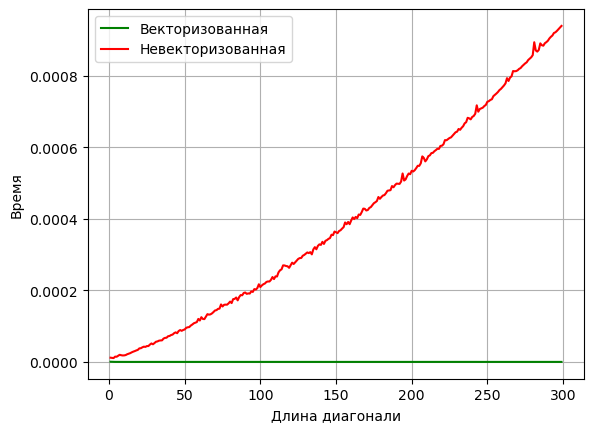

In [26]:
plt.plot([i for i in range(1, 300)], time_vec, label=u"Векторизованная", color='green')
plt.plot([i for i in range(1, 300)], time_unvec, label=u"Невекторизованная", color = 'red')
plt.xlabel(u"Длина диагонали")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)

time_vec = []
time_unvec = []

for ln_diag in range(1, 1000):
    sm_vec = 0
    sm_unvec = 0
    for xx in range(100):
        x_ln = random.randint(ln_diag, 1000)
        x = np.random.rand(ln_diag) * 3
        y = np.random.rand(ln_diag) * 3
        
        x1 = np.random.rand(x_ln) * 3
        y1 = np.random.rand(ln_diag) * 3
        
        tm1 = time()
        fv.are_multisets_equal(x, y)
        sm_vec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x.tolist(), y.tolist())
        sm_unvec += time() - tm1
        
        tm1 = time()
        fv.are_multisets_equal(x1, y1)
        sm_vec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x1.tolist(), y1.tolist())
        sm_unvec += time() - tm1
        
    for yy in range(100):
        y_ln = random.randint(ln_diag, 1000)
        x = np.random.rand(ln_diag) * 3
        y = np.random.rand(ln_diag) * 3
        
        x1 = np.random.rand(ln_diag) * 3
        y1 = np.random.rand(y_ln) * 3

        tm1 = time()
        fv.are_multisets_equal(x, y)
        sm_vec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x.tolist(), y.tolist())
        sm_unvec += time() - tm1
        
        tm1 = time()
        fv.are_multisets_equal(x1, y1)
        sm_vec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x1.tolist(), y1.tolist())
        sm_unvec += time() - tm1

    time_vec.append(sm_vec / 400)
    time_unvec.append(sm_unvec / 400)

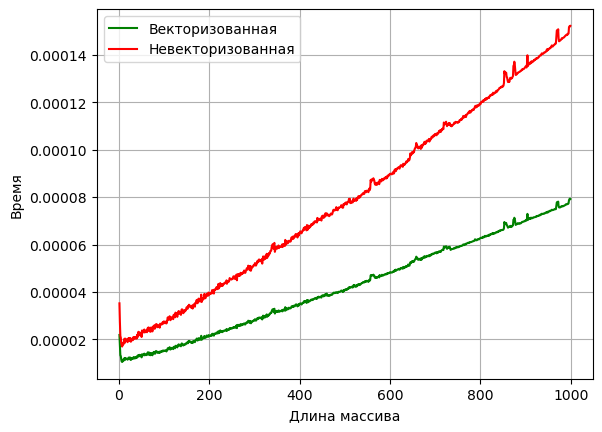

In [123]:
plt.plot([i for i in range(1, 1000)], time_vec, label=u"Векторизованная", color='green')
plt.plot([i for i in range(1, 1000)], time_unvec, label=u"Невекторизованная", color = 'red')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)

time_vec = []
time_unvec = []

for ln_diag in range(1, 1000):
    sm_vec = 0
    sm_unvec = 0
    for xx in range(200):
        x = np.random.rand(ln_diag) * 3
            
        tm1 = time()
        fv.max_after_zero(x)
        sm_vec += time() - tm1

        tm1 = time()
        f.max_after_zero(x.tolist())
        sm_unvec += time() - tm1
        
    time_vec.append(sm_vec / 200)
    time_unvec.append(sm_unvec / 200)

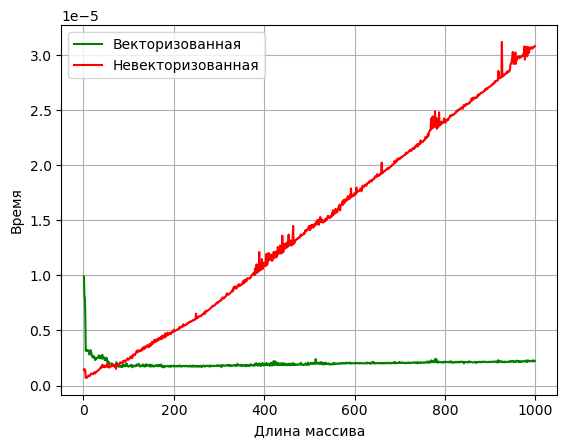

In [126]:
plt.plot([i for i in range(1, 1000)], time_vec, label=u"Векторизованная", color='green')
plt.plot([i for i in range(1, 1000)], time_unvec, label=u"Невекторизованная", color='red')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


Время работы невекторизованной функции:  8.375559091567993
Время работы векторизованной функции:  0.21515274047851562


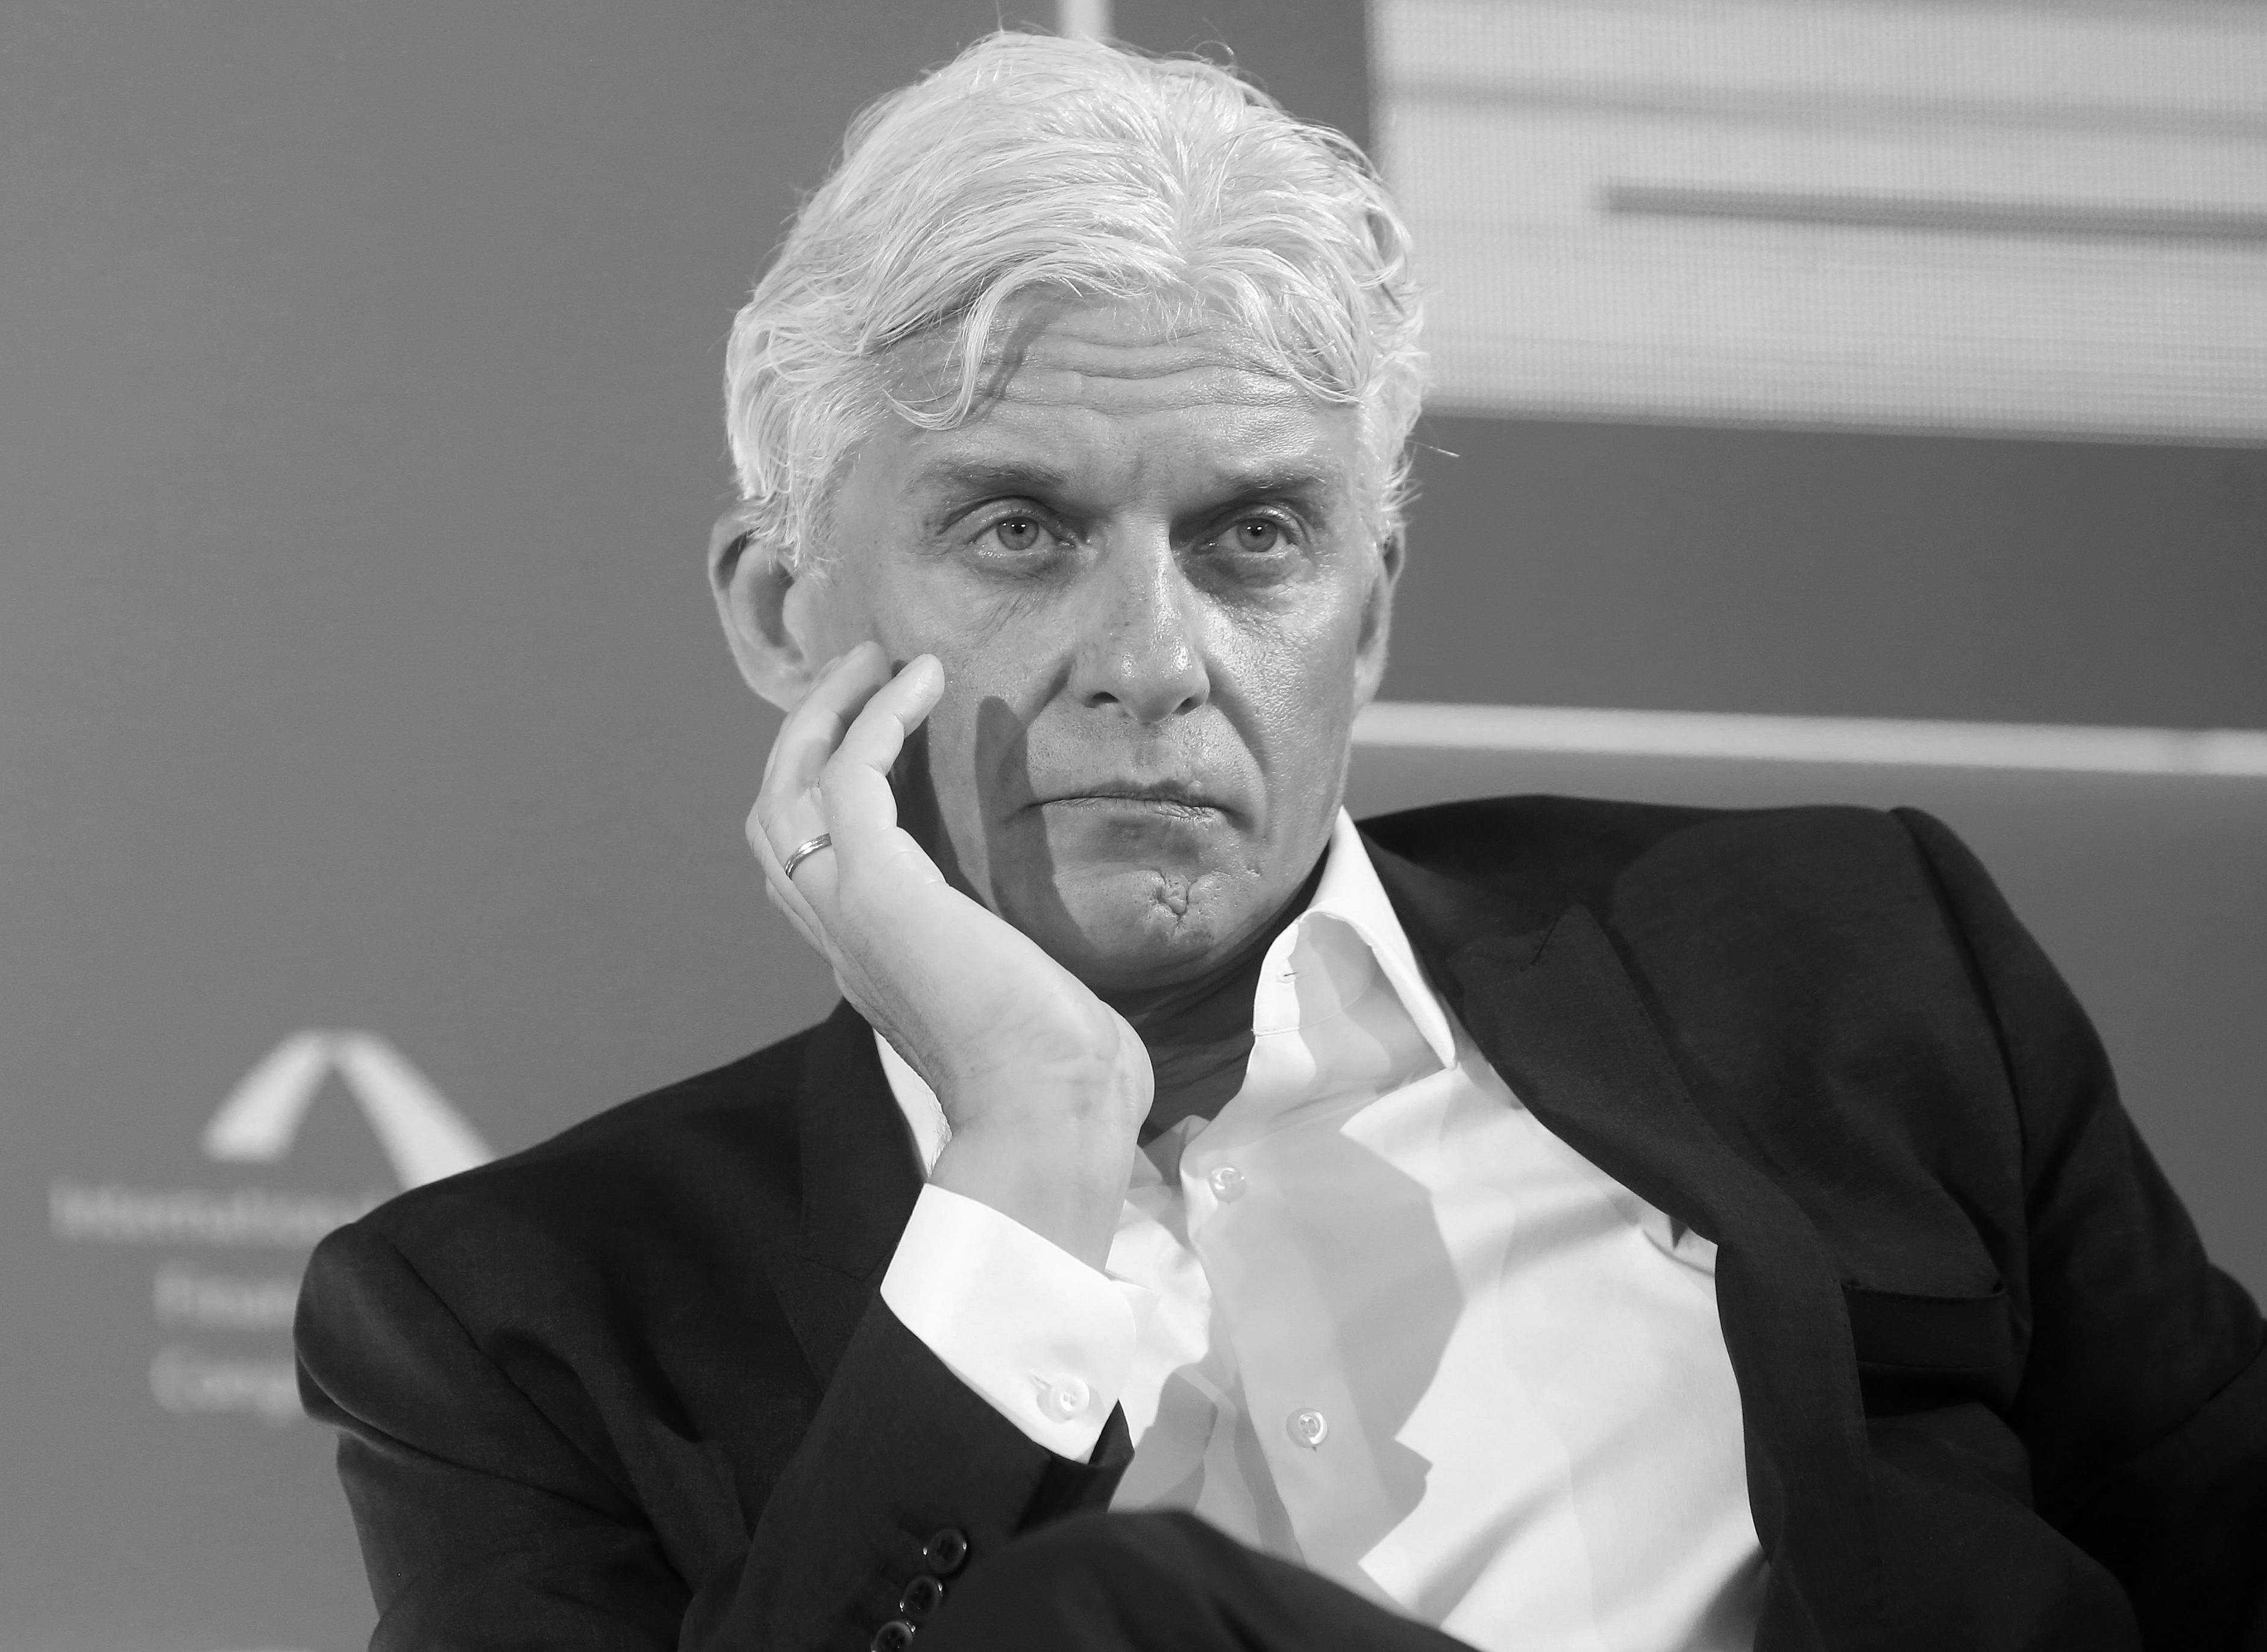

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from PIL import Image, ImageDraw
from time import time
from importlib import reload
reload(f)
reload(fv)

image = Image.open("TINKOFF.jpg")
img = np.asarray(image)
coef = np.array([0.299, 0.587, 0.114])

tm1 = time()
pixels = f.convert_image(img.tolist(), coef.tolist())
array = np.array(pixels, dtype=np.uint8)
new_image = Image.fromarray(array)
print("Время работы невекторизованной функции: ", time() - tm1)

tm2 = time()
pixels_vec = fv.convert_image(img, coef)
new_image_vec = Image.fromarray(pixels_vec)
print("Время работы векторизованной функции: ", time() - tm2)

new_image.save("dead.TINKOFF.png")
display(new_image)


In [ ]:
plt.plot([i for i in range(1, 300)], time_vec, label="Векторизованная", color='green')
plt.plot([i for i in range(1, 300)], time_unvec, label="Невекторизованная", color = 'red')
plt.xlabel(u"Длина диагонали")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)

time_vec = []
time_unvec = []

for ln_diag in range(1, 2000):
    sm_vec = 0
    sm_unvec = 0
    for xx in range(200):
        x = np.random.rand(ln_diag) * 3
            
        tm1 = time()
        fv.run_length_encoding(x)
        sm_vec += time() - tm1

        tm1 = time()
        f.run_length_encoding(x.tolist())
        sm_unvec += time() - tm1
        
    time_vec.append(sm_vec / 200)
    time_unvec.append(sm_unvec / 200)

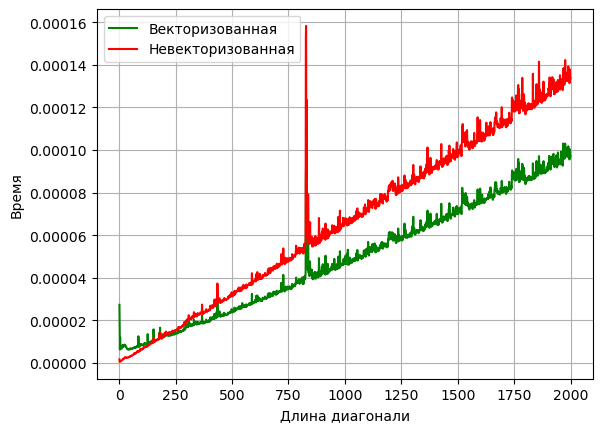

In [101]:
plt.plot([i for i in range(1, 2000)], time_vec, label="Векторизованная", color='green')
plt.plot([i for i in range(1, 2000)], time_unvec, label="Невекторизованная", color = 'red')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
from scipy.spatial.distance import cdist
reload(f)
reload(fv)


time_vec = []
time_unvec = []
time_cdist = []

for ln_diag in range(1, 50):
    sm_vec = 0
    sm_unvec = 0
    sm_cdist = 0
    for xx in range(100):
        x_ln = random.randint(ln_diag, 50)
        x = np.random.rand(ln_diag, x_ln) * 3
        y = np.random.rand(ln_diag, x_ln) * 3

        tm1 = time()
        fv.pairwise_distance(x, y)
        sm_vec += time() - tm1

        tm1 = time()
        f.pairwise_distance(x.tolist(), y.tolist())
        sm_unvec += time() - tm1
        
        tm1 = time()
        a = cdist(x, y, 'euclidean')
        sm_cdist += time() - tm1
        
        
    for yy in range(100):
        y_ln = random.randint(ln_diag, 50)
        x = np.random.rand(y_ln, ln_diag) * 3
        y = np.random.rand(y_ln, ln_diag) * 3

        tm1 = time()
        fv.pairwise_distance(x, y)
        sm_vec += time() - tm1

        tm1 = time()
        f.pairwise_distance(x.tolist(), y.tolist())
        sm_unvec += time() - tm1
        
        tm1 = time()
        a = cdist(x, y, 'euclidean')
        sm_cdist += time() - tm1

    time_vec.append(sm_vec / 200)
    time_unvec.append(sm_unvec / 200)
    time_cdist.append(sm_cdist / 200)

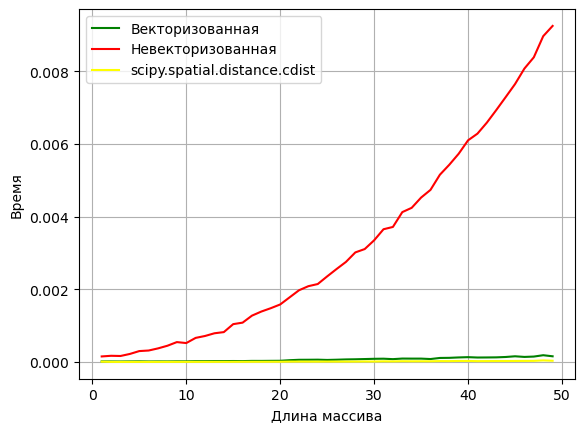

In [120]:
plt.plot([i for i in range(1, 50)], time_vec, label="Векторизованная", color='green')
plt.plot([i for i in range(1, 50)], time_unvec, label="Невекторизованная", color = 'red')
plt.plot([i for i in range(1, 50)], time_cdist, label="scipy.spatial.distance.cdist", color='yellow')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here